<a href="https://colab.research.google.com/github/chitinglow/Classification-Machine-learning/blob/master/Model_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
## Access the performance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create header for the dataset
_headers = ['buying', 'maint', 'doors', 'person',
            'lug_boot', 'safety', 'car']

df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/car.data', names=_headers, index_col=None)
df.head()

,buying,maint,doors,person,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [41]:
training, evaluation = train_test_split(df, test_size=0.3, random_state=0)
validation, test = train_test_split(evaluation, test_size=0.5, random_state=0)

In [42]:
## Linear regression evaluation

_headers = ['CICO', 'SM1', "GATS1i", "NdsCH",
            'Ndscc', "MLOGP", 'response']
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', names=_headers, sep=';')
df.head()

,CICO,SM1,GATS1i,NdsCH,Ndscc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [43]:
## Splitting data
features = df.drop('response', axis=1).values
labels = df[['response']].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

## Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
## Validation of the data
y_pred = model.predict(X_val)

## Performance of the validation
r2 = model.score(X_val, y_val)
print('R^2 score: {}'.format(r2))

R^2 score: 0.5623861754188693


In [45]:
## Comparison to ground truth
_ys = pd.DataFrame(dict(actuals=y_val.reshape(-1), predicted=y_pred.reshape(-1)))
_ys.head()

,actuals,predicted
0,3.742,4.155885
1,6.143,6.398238
2,4.674,5.183181
3,4.865,3.771333
4,4.732,4.593059


In [46]:
# Checking Mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred)
print('MAE:{}'.format(mae))
print('R^2 score: {}'.format(r2))

MAE:0.7243440846447939
R^2 score: 0.5623861754188693


In [47]:
## Second model with feature enginerring
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# pipeline
from sklearn.pipeline import Pipeline
# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

_headers = ['CICO', 'SM1', "GATS1i", "NdsCH",
            'Ndscc', "MLOGP", 'response']
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', names=_headers, sep=';')
df.head()

,CICO,SM1,GATS1i,NdsCH,Ndscc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [48]:
features = df.drop('response', axis=1).values
labels = df[['response']].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

## Create a pipeline and engineer quadratic features

steps = [('scaler', MinMaxScaler()),
         ('poly', PolynomialFeatures(2)),
         ('model', LinearRegression())]

In [49]:
# Create pipe line with Simple linear regeression model
model = Pipeline(steps)
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [50]:
## Predict result with validation data
y_pred = model.predict(X_val)
## Mean absolute error
mae = mean_absolute_error(y_val, y_pred)
print('MAE: {}'.format(mae))

MAE: 0.6605526100836075


In [51]:
## R2 score
## Performance of the validation
r2 = model.score(X_val, y_val)
print('R^2 score: {}'.format(r2))

R^2 score: 0.628492134415339


In [52]:
# Classification model evaluation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Create header for the dataset
_headers = ['buying', 'maint', 'doors', 'person',
            'lug_boot', 'safety', 'car']

df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/car.data', names=_headers, index_col=None)
df.head()

,buying,maint,doors,person,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [53]:
## Encoding categorical variables
_df = pd.get_dummies(df, columns =['buying', 'maint', 'doors', 'person',
                                   'lug_boot', 'safety'])
_df.head()

,car,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,person_2,person_4,person_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [54]:
## Train test split
features = _df.drop('car', axis=1).values
labels = _df['car'].values
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size = 0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [55]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# Making prediction
y_pred = model.predict(X_val)

## Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[ 41,   1,   9,   0],
       [  7,   2,   0,   1],
       [  7,   0, 178,   0],
       [  1,   0,   0,  12]])

In [57]:
# Percision
from sklearn.metrics import precision_score
precision_score(y_val, y_pred, average='macro')

0.8184395261601145

In [58]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_val, y_pred, average='macro')

0.7222901634666341

In [59]:
## F1 score
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='macro')

0.7385284045669938

In [60]:
# Accuracy
from sklearn.metrics import accuracy_score
_accuracy = accuracy_score(y_val, y_pred)
print(_accuracy)

0.8996138996138996


In [61]:
## Log Loss
from sklearn.metrics import log_loss
_loss = log_loss(y_val, model.predict_proba(X_val))
print(_loss)

0.22578836752298448


In [62]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Create header for the dataset
_headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian']

df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/caesarian.csv.arff', names=_headers, index_col=None, skiprows=15)
df.head()

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [63]:
## Train test split
features = df.drop(['Caesarian'], axis=1).values
labels = df[['Caesarian']].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size = 0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [64]:
## Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_proba = model.predict_proba(X_val)
_false_positive, _true_positive, _thresholds = roc_curve(y_val, y_proba[:, 0])
print(_false_positive)

[0.  0.  0.  0.5 0.5 1.  1. ]


In [66]:
print(_true_positive)

[0.         0.16666667 0.33333333 0.33333333 0.83333333 0.83333333
 1.        ]


In [67]:
print(_thresholds)

[1.55519917 0.55519917 0.55005086 0.48008433 0.32085037 0.22083119
 0.19657847]


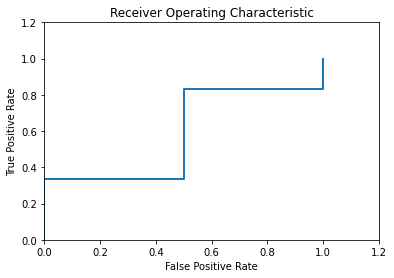

In [68]:
## Plot roc curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(_false_positive, _true_positive, lw=2, label = 'Receiver Operating Characterisitc')
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [69]:
## ROC AUS for caesarian dataset
y_proba = model.predict_proba(X_val)

In [70]:
from sklearn.metrics import roc_auc_score
_auc = roc_auc_score(y_val, y_proba[:, 0])
print(_auc)

0.5833333333333334


In [71]:
## Saving and loading model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


_headers = ['CICO', 'SM1', "GATS1i", "NdsCH",
            'Ndscc', "MLOGP", 'response']
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/qsar_fish_toxicity.csv', names=_headers, sep=';')
df.head()

,CICO,SM1,GATS1i,NdsCH,Ndscc,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [72]:
## Splitting data
features = df.drop('response', axis=1).values
labels = df[['response']].values

X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

## Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
## Validation of the data
y_pred = model.predict(X_val)


In [74]:
from sklearn.externals import joblib
joblib.dump(model, './model.joblib')

['./model.joblib']

In [75]:
m2 = joblib.load('./model.joblib')
m2_preds = m2.predict(X_val)
ys = pd.DataFrame(dict(predicted=y_pred.reshape(-1), m2=m2_preds.reshape(-1)))
ys.head()

,predicted,m2
0,4.155885,4.155885
1,6.398238,6.398238
2,5.183181,5.183181
3,3.771333,3.771333
4,4.593059,4.593059


In [76]:
## Train three different models and pick best performaning model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [77]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
_df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, drop_first=True)
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [78]:
_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [84]:
features = _df.drop('y', axis=1).values
labels = df[['y']].values

## Train test split
X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, random_state=0)

## Logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# Making prediction
y_pred = model.predict(X_val)

## Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[8017,  203],
       [ 631,  416]])

In [88]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      8220
         yes       0.67      0.40      0.50      1047

    accuracy                           0.91      9267
   macro avg       0.80      0.69      0.72      9267
weighted avg       0.90      0.91      0.90      9267



In [89]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
dt_preds = dt_model.predict(X_val)

In [91]:
dt_report = classification_report(y_val, dt_preds)
print(dt_report)

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      8220
         yes       0.66      0.54      0.60      1047

    accuracy                           0.92      9267
   macro avg       0.80      0.75      0.78      9267
weighted avg       0.91      0.92      0.91      9267



In [92]:
rf_model = RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)
rf_report = classification_report(y_val, rf_preds)
print(rf_report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

          no       0.94      0.97      0.95      8220
         yes       0.68      0.47      0.56      1047

    accuracy                           0.91      9267
   macro avg       0.81      0.72      0.75      9267
weighted avg       0.91      0.91      0.91      9267



In [95]:
print('Linear Score: {}, DecisionTree Score: {}, RandomForest Score: {}'.format(model.score(X_val, y_val), dt_model.score(X_val, y_val), rf_model.score(X_val, y_val)))

Linear Score: 0.9100032372936225, DecisionTree Score: 0.9172331930506097, RandomForest Score: 0.9147512679400022
